# Image Datasets

In [2]:
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *

In [21]:
from nimrod.image.datasets import ImageDataset, ImageDataModule, ImageSuperResDataModule, ImageSuperResDataset

from torchvision.transforms import v2 as transforms
from torch.utils.data import DataLoader

from rich import print
from omegaconf import OmegaConf
from hydra.utils import instantiate

## MNIST

Seed set to 42


{'_target_': 'nimrod.image.datasets.ImageDataset', 'name': 'mnist', 'data_dir': '../data/image', 'split': 'test', 
'transforms': {'_target_': 'torchvision.transforms.Compose', 'transforms': [{'_target_': 
'torchvision.transforms.ToTensor'}, {'_target_': 'torchvision.transforms.Normalize', 'mean': [0.0], 'std': 
[0.2]}]}}

[16:40:23] INFO - loading dataset mnist with args () from split test
[16:40:23] INFO - loading dataset mnist from split test
Overwrite dataset info from restored data version if exists.
[16:40:26] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c
[16:40:26] INFO - Loading Dataset info from ../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c
Found cached dataset mnist (/Users/slegroux/Projects/nimrod/nbs/../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c)
[16:40:26] INFO - Found cached dataset mnist (/Users/slegroux/Projects/nimrod/nbs/../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c)
Loading Dataset info from /Users/slegroux/Projects/nimrod/nbs/../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c
[16:40:26] INFO - Loading Dataset info from /Users/slegroux/Projects/nimrod/nbs/../data/im

torch.float32 <class 'int'>

Number of samples in the dataset: 10000

torch.Size([1, 28, 28])
7 torch.FloatTensor <class 'int'>

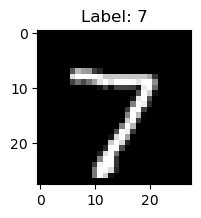

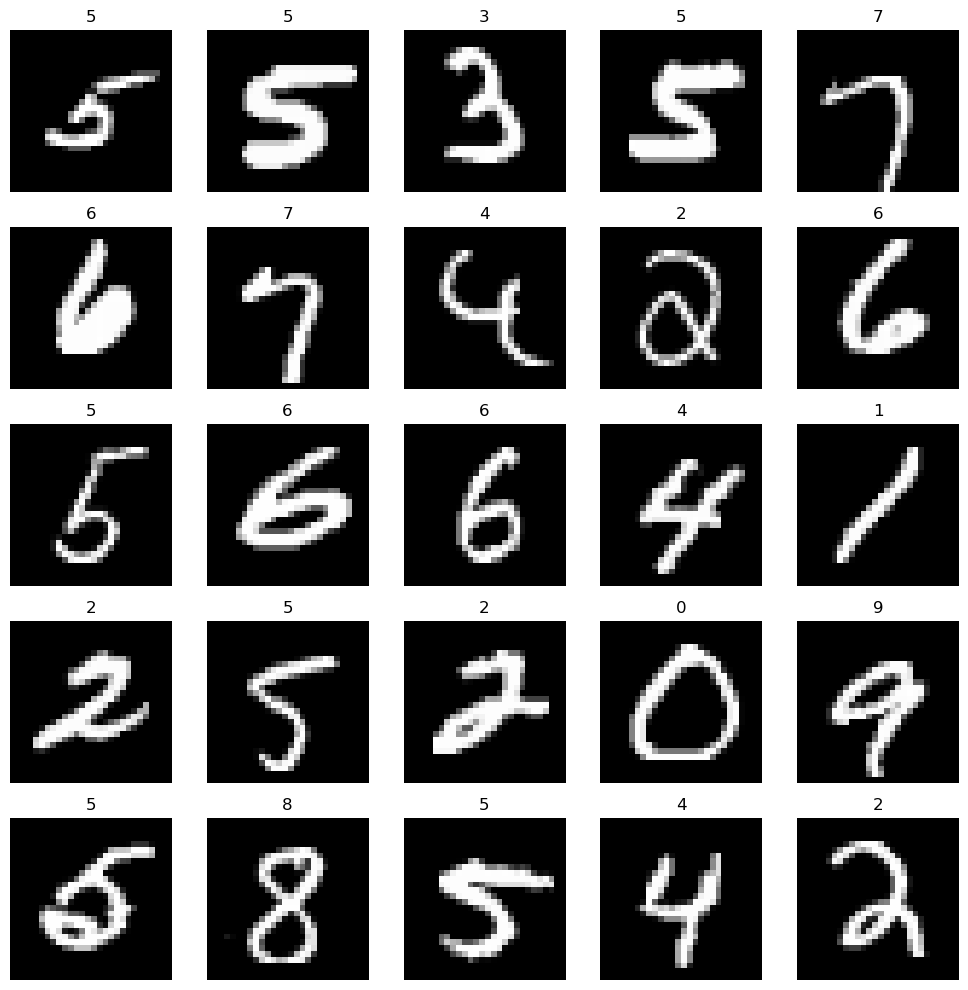

In [31]:
# instantiate dataset from yaml config file
cfg = OmegaConf.load("../config/image/data/mnist.yaml")
print(cfg.dataset)
test = instantiate(cfg.dataset)
type(test)

# output ( (B,C, H,W), int)
print(test[0][0].dtype, type(test[0][1]))
print(f"Number of samples in the dataset: {len(test)}")

# get item helper
X, y = test[0]
print(X.shape, y, X.type(), type(y))

# display each digit
test.show(0)
test.show_grid(5, 5)

# split data
train, dev = test.train_dev_split(0.8)

## Smithsonian Butterflies

Repo card metadata block was not found. Setting CardData to empty.
[16:40:39] WARNING - Repo card metadata block was not found. Setting CardData to empty.
Overwrite dataset info from restored data version if exists.
[16:40:40] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from /Users/slegroux/.cache/huggingface/datasets/huggan___smithsonian_butterflies_subset/default/0.0.0/3cdedf844922ab40393d46d4c7f81c596e1c6d45
[16:40:40] INFO - Loading Dataset info from /Users/slegroux/.cache/huggingface/datasets/huggan___smithsonian_butterflies_subset/default/0.0.0/3cdedf844922ab40393d46d4c7f81c596e1c6d45
[16:40:40] INFO - loading dataset huggan/smithsonian_butterflies_subset with args () from split train
[16:40:40] INFO - loading dataset huggan/smithsonian_butterflies_subset from split train
Repo card metadata block was not found. Setting CardData to empty.
[16:40:41] WARNING - Repo card metadata block was not found. Setting CardData to empty.
Overwrite d

num_classes: 45, splits: dict_keys(['train']), labels: ['Animalia, Arthropoda, Insecta, Lepidoptera, Pieridae, 
Pierinae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Pyralidae', 'Animalia, Arthropoda, Hexapoda, Insecta, 
Lepidoptera, Nymphalidae, Nymphalinae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Noctuidae, 
Erebinae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Nymphalidae, Heliconiinae', 'Animalia, 
Arthropoda, Insecta, Lepidoptera, Tortricidae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Arctiidae', 
'Animalia, Arthropoda, Insecta, Lepidoptera, Pieridae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, 
Saturniidae, Saturniinae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Arctiidae', 'Animalia, Arthropoda, 
Hexapoda, Insecta, Lepidoptera, Pieridae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Geometridae, Larentiinae', 
'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Lycaenidae, Lycaeninae', 'Animalia, Arthropoda, Insecta, 
Lepidoptera, Geometridae, Sterrhinae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Nymphalidae, 
Morphinae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Geometridae, Geometrinae', 'Animalia, Arthropoda, 
Hexapoda, Insecta, Lepidoptera, Nymphalidae, Heliconinae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, 
Nymphalidae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Papilionidae, Papilioninae', 'Animalia, Arthropoda, 
Insecta, Lepidoptera, Glossata, Gelechiidae', 'Animalia, Arthropoda, Hexapoda, Insecta, Pterygota, Holometabola, 
Lepidoptera, Nymphalidae, Danainae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Nymphalidae, 
Satyrinae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Papilionidae, Parnassiinae', 'Animalia, Arthropoda, 
Hexapoda, Insecta, Lepidoptera, Saturniidae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Lasiocampidae', 
'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Nymphalidae, Biblidinae', 'Animalia, Arthropoda, Hexapoda, 
Insecta, Lepidoptera, Lycaenidae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Geometridae, Oenochrominae', 
'Animalia, Arthropoda, Insecta, Lepidoptera, Pieridae, Coliadinae', 'Animalia, Arthropoda, Hexapoda, Insecta, 
Lepidoptera, Nymphalidae, Charaxinae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Nymphalidae, Charaxinae', 
'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Nymphalidae, Danainae', 'Animalia, Arthropoda, Hexapoda, 
Insecta, Lepidoptera, Papilionidae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Geometridae, Ennominae', 
'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Sphingidae', 'Animalia, Arthropoda, Hexapoda, Insecta, 
Lepidoptera, Pieridae, Dismorphiinae', 'Animalia, Arthropoda, Insecta, Lepidoptera, Nymphalidae, Nymphalinae', 
'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Pieridae, Coliadinae', 'Animalia, Arthropoda, Hexapoda, 
Insecta, Lepidoptera, Pieridae, Pierinae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Uraniidae', 
'Animalia, Arthropoda, Insecta, Lepidoptera, Pieridae, Dismorphiinae', 'Animalia, Arthropoda, Insecta, Lepidoptera,
Pyralidae, Epipaschiinae', 'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Lycaenidae, Polyommatinae', 
'Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Papilionidae, Papilioninae', 'Animalia, Arthropoda, 
Hexapoda, Insecta, Lepidoptera, Nymphalidae, Limenitidinae']

label for image 10 : 4 Animalia, Arthropoda, Hexapoda, Insecta, Lepidoptera, Nymphalidae, Heliconiinae

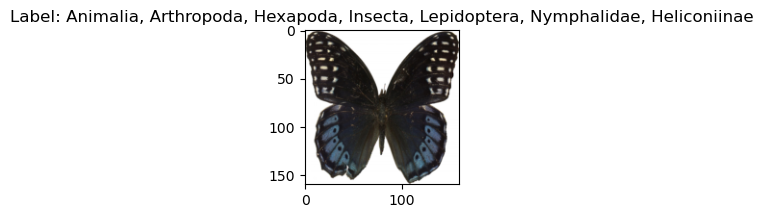

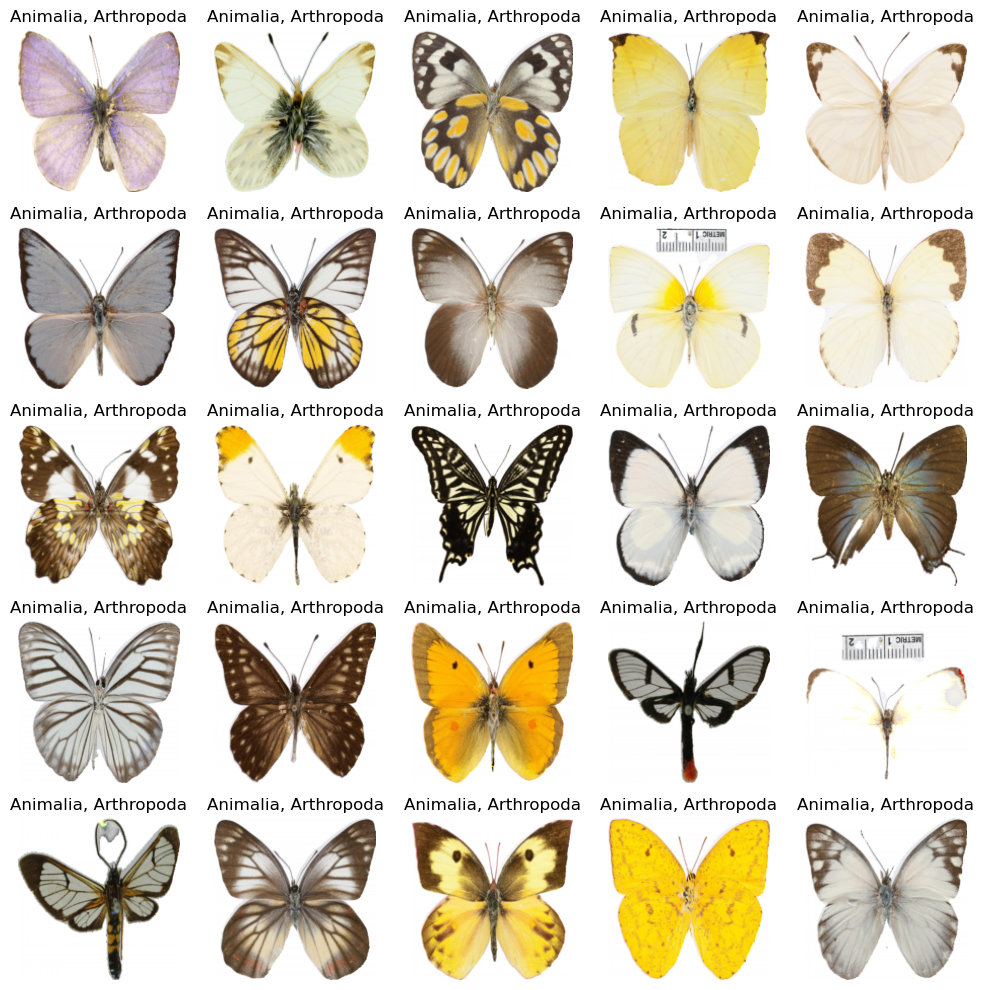

In [32]:
#| notest
test = ImageDataset(
    "huggan/smithsonian_butterflies_subset",
    data_dir='../data/image',
    split='train',
    transforms=transforms.Compose([transforms.ToTensor(),transforms.Resize((160, 160))]), #,transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    exclude_grey_scale=True
)

print(f"num_classes: {test.num_classes}, splits: {test.splits}, labels: {test.label_names}")
# print("from in to class method",test.hf_ds.features['label'].int2str)
# print(test.hf_ds.features['label'])

idx = 10
print(f"label for image {idx} :", test[idx][1], test.int2str(test[idx][1]))
test.show(idx)
test.show_grid(5, 5)

## Tiny Imagenet

In [13]:
#| notest
tiny_imagenet_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.4822, 0.4495, 0.3985], std=[0.2771, 0.2690, 0.2826])
        ])

test = ImageDataset(
    # 'zh-plus/tiny-imagenet',
    # "jeremyf/tiny-imagent-200",
    "slegroux/tiny-imagenet-200-clean",
    data_dir='../data/image',
    transforms=tiny_imagenet_transform,
)


[16:19:14] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[16:19:14] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[16:19:16] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
[16:19:16] INFO - Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
Found cached dataset tiny-imagenet-200-clean (/Users/slegroux/Projects/nimrod/nbs/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2)
[16:19:16] INFO - Found cached dataset tiny-imagenet-200-clean (/Users/slegroux/Projects/nimrod/nbs/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2)
Loading D

Xb: 
torch.Size([4096, 3, 64, 64])

channel mean and variance over batch tensor([-0.0208, -0.0135, -0.0154]) tensor([1.0012, 1.0023, 0.9980])

num_classes: 200

labels: ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 
'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 
'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 
'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 
'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 
'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 
'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 
'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 
'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 
'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684', 'n02883205', 'n02892201', 'n02906734', 
'n02909870', 'n02917067', 'n02927161', 'n02948072', 'n02950826', 'n02963159', 'n02977058', 'n02988304', 
'n02999410', 'n03014705', 'n03026506', 'n03042490', 'n03085013', 'n03089624', 'n03100240', 'n03126707', 
'n03160309', 'n03179701', 'n03201208', 'n03250847', 'n03255030', 'n03355925', 'n03388043', 'n03393912', 
'n03400231', 'n03404251', 'n03424325', 'n03444034', 'n03447447', 'n03544143', 'n03584254', 'n03599486', 
'n03617480', 'n03637318', 'n03649909', 'n03662601', 'n03670208', 'n03706229', 'n03733131', 'n03763968', 
'n03770439', 'n03796401', 'n03804744', 'n03814639', 'n03837869', 'n03838899', 'n03854065', 'n03891332', 
'n03902125', 'n03930313', 'n03937543', 'n03970156', 'n03976657', 'n03977966', 'n03980874', 'n03983396', 
'n03992509', 'n04008634', 'n04023962', 'n04067472', 'n04070727', 'n04074963', 'n04099969', 'n04118538', 
'n04133789', 'n04146614', 'n04149813', 'n04179913', 'n04251144', 'n04254777', 'n04259630', 'n04265275', 
'n04275548', 'n04285008', 'n04311004', 'n04328186', 'n04356056', 'n04366367', 'n04371430', 'n04376876', 
'n04398044', 'n04399382', 'n04417672', 'n04456115', 'n04465501', 'n04486054', 'n04487081', 'n04501370', 
'n04507155', 'n04532106', 'n04532670', 'n04540053', 'n04560804', 'n04562935', 'n04596742', 'n04597913', 
'n06596364', 'n07579787', 'n07583066', 'n07614500', 'n07615774', 'n07695742', 'n07711569', 'n07715103', 
'n07720875', 'n07734744', 'n07747607', 'n07749582', 'n07753592', 'n07768694', 'n07871810', 'n07873807', 
'n07875152', 'n07920052', 'n09193705', 'n09246464', 'n09256479', 'n09332890', 'n09428293', 'n12267677']

splits: dict_keys(['train', 'validation', 'test'])

label for image 10 : 0 n01443537

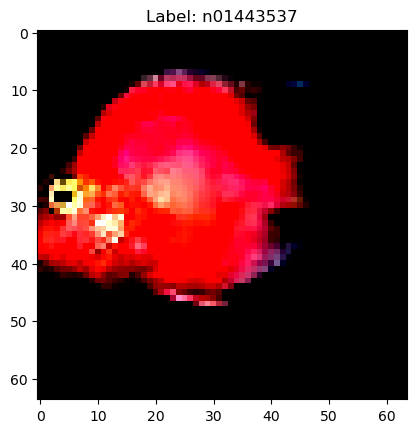

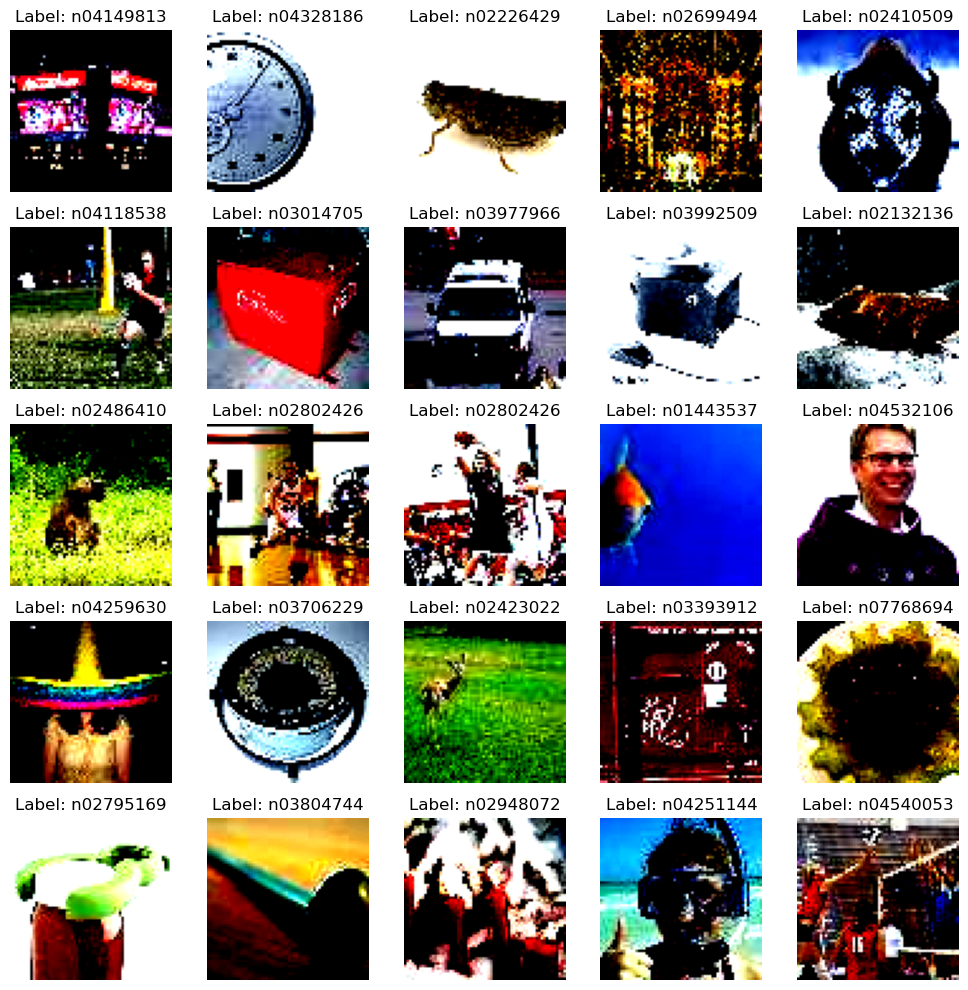

In [14]:
#| notest

# DATALOADER
test[0][0].shape
dl = DataLoader(test, batch_size=4096, shuffle=True)
xb, _ = next(iter(dl))
print("Xb: ", xb.shape)
print("channel mean and variance over batch", xb.mean(dim=(0,2,3)), xb.std(dim=(0, 2,3)))

# DATSET PROPERTIES
print(f"num_classes: {test.num_classes}")
print(f"labels: {test.label_names}")
print(f"splits: {test.splits}")
# print("from in to class method",test.hf_ds.features['label'].int2str)
# print(test.hf_ds.features['label'])

idx = 10
print(f"label for image {idx} :", test[idx][1], test.int2str(test[idx][1]))
test.show(idx)
test.show_grid(5,5)

## CIFAR10

Seed set to 42
[16:28:26] INFO - loading dataset cifar10 with args () from split test
[16:28:26] INFO - loading dataset cifar10 from split test
Overwrite dataset info from restored data version if exists.
[16:28:29] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/cifar10/plain_text/0.0.0/0b2714987fa478483af9968de7c934580d0bb9a2
[16:28:29] INFO - Loading Dataset info from ../data/image/cifar10/plain_text/0.0.0/0b2714987fa478483af9968de7c934580d0bb9a2
Found cached dataset cifar10 (/Users/slegroux/Projects/nimrod/nbs/../data/image/cifar10/plain_text/0.0.0/0b2714987fa478483af9968de7c934580d0bb9a2)
[16:28:29] INFO - Found cached dataset cifar10 (/Users/slegroux/Projects/nimrod/nbs/../data/image/cifar10/plain_text/0.0.0/0b2714987fa478483af9968de7c934580d0bb9a2)
Loading Dataset info from /Users/slegroux/Projects/nimrod/nbs/../data/image/cifar10/plain_text/0.0.0/0b2714987fa478483af9968de7c934580d0bb9a2
[16:28:29] INFO - Loading Datase

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

Caching processed dataset at /Users/slegroux/Projects/nimrod/data/image/cifar10/plain_text/0.0.0/0b2714987fa478483af9968de7c934580d0bb9a2/cache-43ae4faeb9da5ba5.arrow
[16:28:29] INFO - Caching processed dataset at /Users/slegroux/Projects/nimrod/data/image/cifar10/plain_text/0.0.0/0b2714987fa478483af9968de7c934580d0bb9a2/cache-43ae4faeb9da5ba5.arrow


num_classes: 10, splits: dict_keys(['train', 'test']), labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 
'dog', 'frog', 'horse', 'ship', 'truck']

from in to class method <bound method ClassLabel.int2str of ClassLabel(names=['airplane', 'automobile', 'bird', 
'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None)>

label for image 10 : 0 airplane

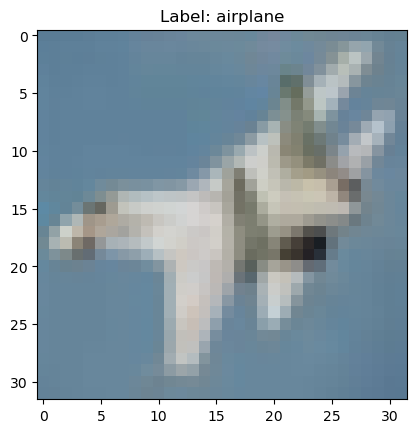

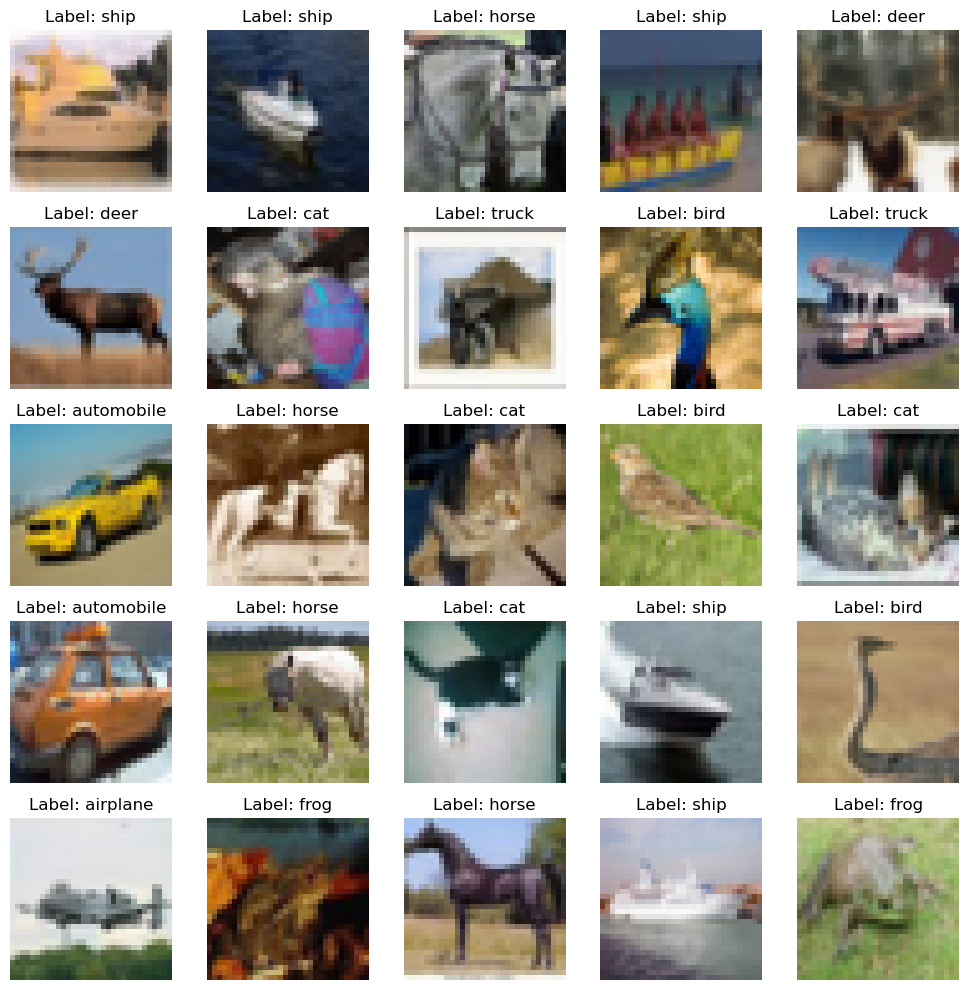

In [25]:

#| notest

test = ImageDataset(
    "cifar10",
    data_dir='../data/image',
    split='test',
    transforms=transforms.Compose([transforms.ToTensor()]), #,transforms.Resize((32, 32))]), #,transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    exclude_grey_scale=True
)

print(f"num_classes: {test.num_classes}, splits: {test.splits}, labels: {test.label_names}")
print("from in to class method",test.hf_ds.features['label'].int2str)
idx = 10
print(f"label for image {idx} :", test[idx][1], test.int2str(test[idx][1]))
test.show(idx)
test.show_grid(5,5)

## ImageNette

Overwrite dataset info from restored data version if exists.
[16:21:57] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from /Users/slegroux/.cache/huggingface/datasets/frgfm___imagenette/160px/1.0.0/a8a496123b40fa739da2acf9b0dae339d30c7bae
[16:21:57] INFO - Loading Dataset info from /Users/slegroux/.cache/huggingface/datasets/frgfm___imagenette/160px/1.0.0/a8a496123b40fa739da2acf9b0dae339d30c7bae
[16:21:57] INFO - loading dataset frgfm/imagenette with args ('160px',) from split validation
[16:21:57] INFO - loading dataset frgfm/imagenette from split validation
Overwrite dataset info from restored data version if exists.
[16:21:58] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from /Users/slegroux/.cache/huggingface/datasets/frgfm___imagenette/160px/1.0.0/a8a496123b40fa739da2acf9b0dae339d30c7bae
[16:21:58] INFO - Loading Dataset info from /Users/slegroux/.cache/huggingface/datasets/frgfm___imagenette/16

Filter:   0%|          | 0/3925 [00:00<?, ? examples/s]

Caching processed dataset at /Users/slegroux/.cache/huggingface/datasets/frgfm___imagenette/160px/1.0.0/a8a496123b40fa739da2acf9b0dae339d30c7bae/cache-f77575ef32d9af2e.arrow
[16:21:58] INFO - Caching processed dataset at /Users/slegroux/.cache/huggingface/datasets/frgfm___imagenette/160px/1.0.0/a8a496123b40fa739da2acf9b0dae339d30c7bae/cache-f77575ef32d9af2e.arrow


num_classes: 10, splits: dict_keys(['train', 'validation']), labels: ['tench', 'English springer', 'cassette 
player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']

from in to class method <bound method ClassLabel.int2str of ClassLabel(names=['tench', 'English springer', 
'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute'], 
id=None)>

label for image 10 : 2 cassette player

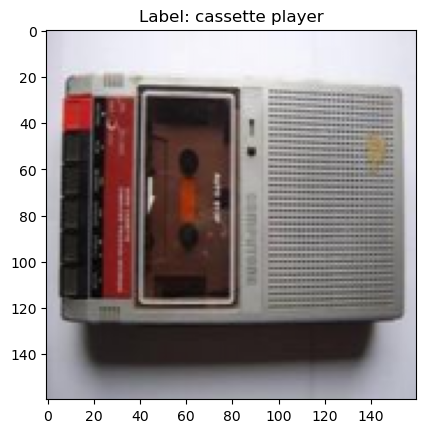

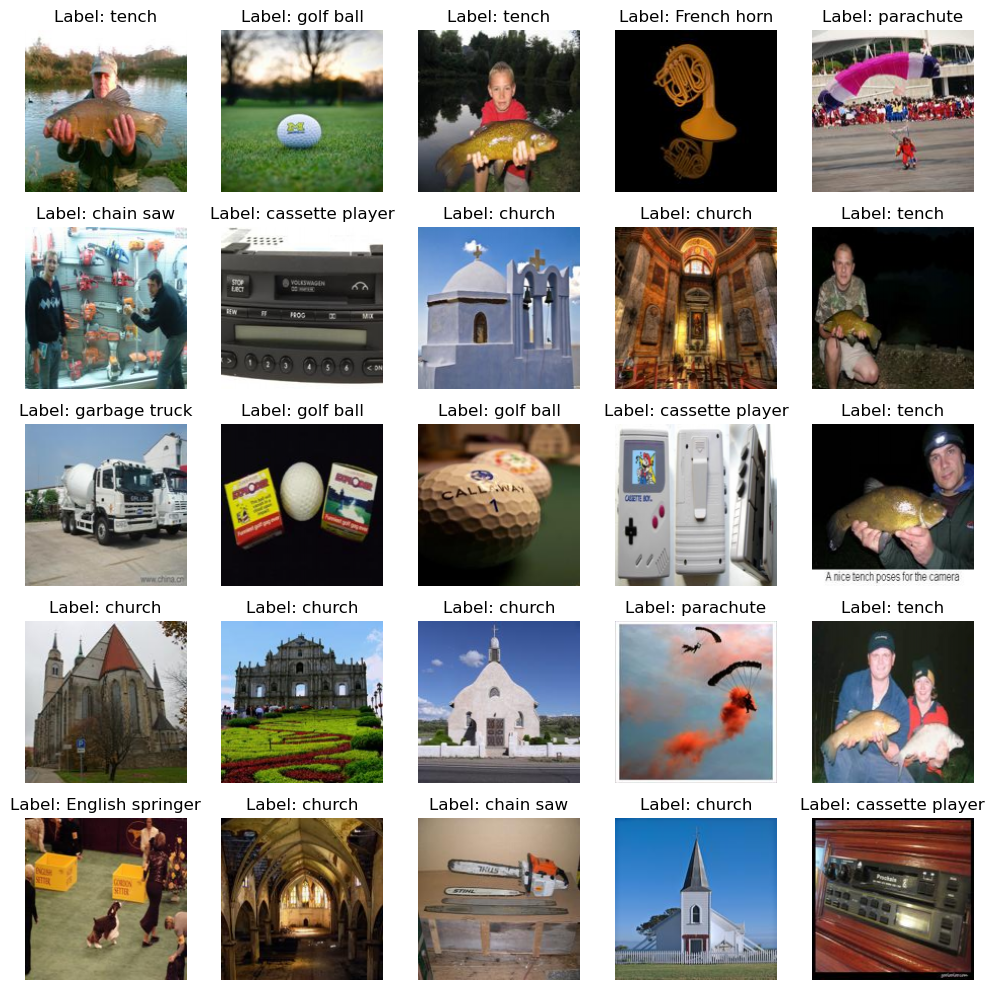

X: torch.Size([3, 160, 160]), y: 2

torch.Size([64, 3, 160, 160])
torch.Size([64])

In [18]:

#| notest

test = ImageDataset(
    'frgfm/imagenette',
    '160px',
    data_dir=None,
    split='validation',
    transforms=transforms.Compose([transforms.ToTensor(),transforms.Resize((160, 160))]), #,transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    exclude_grey_scale=True
)
print(f"num_classes: {test.num_classes}, splits: {test.splits}, labels: {test.label_names}")
print("from in to class method",test.hf_ds.features['label'].int2str)
# print(test.hf_ds.features['label'])
# test2 = ImageDataset('mnist', data_dir=None, train=True, transforms=transforms.ToTensor())
# test3 = ImageDataset('fashion_mnist', data_dir=None, train=True, transforms=transforms.ToTensor())
idx = 10
print(f"label for image {idx} :", test[idx][1], test.int2str(test[idx][1]))
test.show(idx)
test.show_grid(5,5)

# DATA LOADER
print(f" X: {test[0][0].shape}, y: {test[0][1]}")
dl = DataLoader(test, batch_size=64)
print(next(iter(dl))[0].shape, next(iter(dl))[1].shape)